<a href="https://colab.research.google.com/github/tuanlamdao/datascience/blob/master/5_Evaluating_and_Comparing_Learners_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn import (model_selection, neighbors, metrics, datasets,linear_model,naive_bayes)
import sklearn.model_selection as skms
import matplotlib.pyplot as plt
import seaborn as sns
N=20
ftr = np.linspace(-10,10, num=N)
tgt = 2*ftr**2 - 3 + np.random.uniform(-2,2,N)
print(ftr)
print(tgt)
(train_ftr, test_ftr, train_tgt, test_tgt) = skms.train_test_split(ftr, tgt,test_size=N//2)
display(pd.DataFrame({"ftr": train_ftr,
                      "tgt": train_tgt}).T)

[-10.          -8.94736842  -7.89473684  -6.84210526  -5.78947368
  -4.73684211  -3.68421053  -2.63157895  -1.57894737  -0.52631579
   0.52631579   1.57894737   2.63157895   3.68421053   4.73684211
   5.78947368   6.84210526   7.89473684   8.94736842  10.        ]
[198.51482952 157.21636244 121.96198746  91.85328131  63.24417555
  42.28997016  22.35065554  11.71576529   3.35298237  -1.69262222
  -4.10450583   3.03702704  11.5529983   25.63507721  40.9238637
  64.13903593  91.78994525 119.81203514 155.16530819 195.0086769 ]


,0,1,2,3,4,5,6,7,8,9
ftr,3.684211,4.736842,6.842105,0.526316,1.578947,8.947368,-6.842105,-2.631579,2.631579,10.000000
tgt,25.635077,40.923864,91.789945,-4.104506,3.037027,155.165308,91.853281,11.715765,11.552998,195.008677


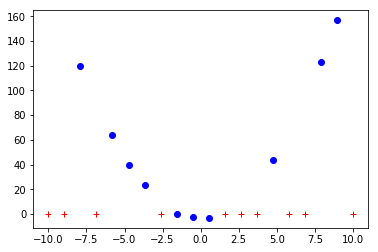

In [ ]:

plt.plot(train_ftr, train_tgt, 'bo')
plt.plot(test_ftr,np.zeros_like(test_tgt), 'r+')
plt.show()

In [ ]:
from sklearn import (linear_model, metrics,neighbors)

In [ ]:
sk_model = linear_model.LinearRegression()
sk_fit   = sk_model.fit(train_ftr.reshape(-1,1),train_tgt)
sk_preds = sk_fit.predict(test_ftr.reshape(-1,1))
sk_preds[:3]


array([70.88904666, 78.6648119 , 63.11328142])

Try to predict with 1D polynomial model ( a straigt line) 

In [ ]:
model_one = np.poly1d(np.polyfit(train_ftr, train_tgt,1))
preds_one = model_one(test_ftr)
print(preds_one[:3])

[70.88904666 78.6648119  63.11328142]


In [ ]:
print('all close ?', np.allclose(sk_preds, preds_one))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(test_tgt,preds_one)))

all close ? True
RMSE:  85.78894684232961


we can use other alternative systems, np.poly1d ( not always sklearn) to learn models and even use those alternative system with sklearn to do evaluation  

In [ ]:
model_two = np.poly1d(np.polyfit(train_ftr,train_tgt,2))
preds_two = model_two(test_ftr)
print('RMSE: ', np.sqrt(metrics.mean_squared_error(test_tgt,preds_two)))

RMSE:  1.643774337578078


The test error has been improved a bit when we use a 2D polynomial (parabola) to predict  - RMSE = 1.4626015280757485

In [ ]:
model_three = np.poly1d(np.polyfit(train_ftr,train_tgt,9))
preds_three = model_three(test_ftr)
print('RMSE: ', np.sqrt(metrics.mean_squared_error(test_tgt,preds_three)))

RMSE:  672.0440955305662


However, we get worse result - a big error while trying to predict with a 9D polynomial model - RMSE = 56.186758836423266

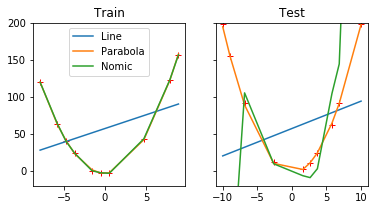

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(6,3),sharey=True)
labels = ['Line','Parabola','Nomic']
models = [model_one,model_two,model_three]
train  = (train_ftr, train_tgt)
test   = (test_ftr, test_tgt)
for ax, (ftr,tgt) in zip(axes,[train,test]):
    ax.plot(ftr,tgt,'r+')
    for m, lbl in zip(models, labels):
        ftr = sorted(ftr)
        ax.plot(ftr, m(ftr), '-', label=lbl)
axes[1].set_ylim(-20,200)
axes[0].set_title('Train')
axes[1].set_title('Test')
axes[0].legend(loc='upper center')
          


the above chart show us: 
    - the model one, the straight line, has a great difficulty because our real world follows a curved trajectory.
    - the model two, the parabola, eats that up. It follows the curve just about perfectly
    - the model three, the nomic, seems do wonderfully when we train, but has problems when we go to testing.

             Train error  Test Error
complexity                          
1           5.108704e+01   85.788947
2           7.918796e-01    1.643774
6           5.249565e-01    4.000297
9           5.436868e-13  672.044096


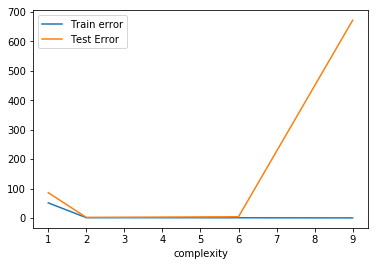

In [ ]:
results = []
for complexity in [1,2,6,9]:
    model = np.poly1d(np.polyfit(train_ftr, train_tgt, complexity))
    train_error = np.sqrt(metrics.mean_squared_error(train_tgt, model(train_ftr)))
    test_error = np.sqrt(metrics.mean_squared_error(test_tgt, model(test_ftr)))
    results.append((complexity, train_error, test_error))
    columns = ['complexity', "Train error","Test Error"]
    results_df = pd.DataFrame.from_records(results, columns = columns, index = "complexity")
print(results_df)  
results_df.plot()

#### K- Cross Validation

In [ ]:
diabetes = datasets.load_diabetes()
diabetes_model = neighbors.KNeighborsRegressor(10)
model_selection.cross_val_score(diabetes_model,diabetes.data, diabetes.target,cv=5,scoring='neg_mean_squared_error')

array([-3206.7541573 , -3426.43134831, -3587.94215909, -3039.49443182,
       -3282.60159091])

In [ ]:
iris = datasets.load_iris()
iris_model = neighbors.KNeighborsClassifier(10)
model_selection.cross_val_score(iris_model,iris.data,iris.target,cv=5)


array([0.96666667, 1.        , 1.        , 0.93333333, 1.        ])

##### Stratification.
default in sklearn, classifier goes with stratified manner when it split data in k folds to do CV. Stratification is a away to ensure target classs represented in each of K fold dataset as per their percentage contribution to the whole data set. this is a important factor to ensure data in each of K folds dataset good for training the model

In [ ]:
# running non-stratified cv
non_strat_kf = model_selection.KFold(5)
model_selection.cross_val_score(iris_model,iris.data,iris.target,cv=non_strat_kf)

array([1.        , 1.        , 0.86666667, 0.96666667, 0.76666667])

The last fold ( 0.76666667 ) probably has the bad distribution of flowers

##### Repeated train test split

Repeat,0,1,2,3,4,5,6,7,8,9
RMSE,48.976556,51.505302,51.778581,54.127248,54.408976,54.910857,55.216925,55.806064,57.795747,59.262292


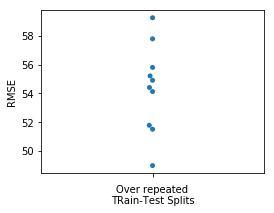

,count,mean,std,min,25%,50%,75%,max
RMSE,10.0,54.378855,3.033392,48.976556,52.365747,54.659916,55.658779,59.262292


In [ ]:
linreg = linear_model.LinearRegression()
scores = []
for r in range(10):
    trainTestSplit = model_selection.train_test_split(diabetes.data,diabetes.target,test_size=.25)
    (diabetes_train_ftr, diabetes_test_ftr, diabetes_train_tgt, diabetes_test_tgt) = trainTestSplit
    fit = linreg.fit(diabetes_train_ftr,diabetes_train_tgt)
    preds = fit.predict(diabetes_test_ftr)
    score = metrics.mean_squared_error(diabetes_test_tgt, preds)
    scores.append(score)
scores = pd.Series(np.sqrt(sorted(scores)))
df = pd.DataFrame({'RMSE': scores})
df.index.name = 'Repeat'
display(df.T)

ax = plt.figure(figsize = (4,3)).gca()
sns.swarmplot(y='RMSE',data=df,ax=ax)
ax.set_xlabel('Over repeated\nTRain-Test Splits')
plt.show()
display(df.describe().T)

Differrence between k-CV -  K folds Cross Validation and repeated train test split:
1. with k-CV, we will get one and only one , prediction for each and every example. each example is in precisely one test bucket. The prediction for the whole dataset will be aggregated from the k models that develop on differenct set of data.
2. with repeated train test split, we may completely ignore traiing or predicting on some examples and make repeated prediction on other example 

Use shufflesplit with CV

,count,mean,std,min,25%,50%,75%,max
RMSE,10.0,53.887753,2.592288,50.089374,52.89703,53.011738,54.944959,59.732477


Text(0.5, 0, 'Over repeated/nTrain test splits')

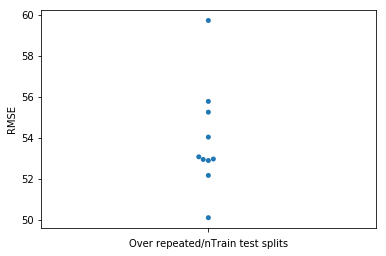

In [ ]:
shufflesplit = model_selection.ShuffleSplit(test_size = .25) # default 10 splits
scores = model_selection.cross_val_score(linreg,diabetes.data,diabetes.target,cv=shufflesplit,scoring='neg_mean_squared_error')
scores = pd.Series(np.sqrt(-scores))
df = pd.DataFrame({'RMSE': scores})
df.index.name = 'Repeat'
display(df.describe().T)
ax = sns.swarmplot(y='RMSE', data = df)
ax.set_xlabel('Over repeated/nTrain test splits')

Use random_state with shufflesplit

In [ ]:
shufflesplit_with_randomstate = model_selection.ShuffleSplit(test_size=.25, random_state = 42)
next(shufflesplit_with_randomstate.split(diabetes.data))[0][:10]


array([ 16, 408, 432, 316,   3,  18, 355,  60, 398, 124])

Leave one out cross validation

,count,mean,std,min,25%,50%,75%,max
RMSE,442.0,44.355661,32.197313,0.20751,18.48197,39.547237,63.973834,158.235451


Text(0.5, 0, 'Over Leave one out\nTrain test splits')

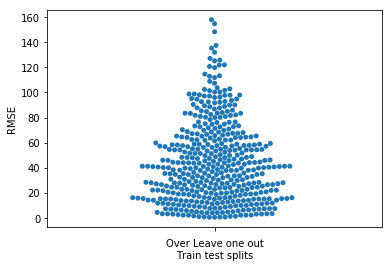

In [ ]:
leave_one_out = model_selection.LeaveOneOut()
scores = model_selection.cross_val_score(linreg,diabetes.data,diabetes.target,cv=leave_one_out,scoring='neg_mean_squared_error')
scores = pd.Series(np.sqrt(-scores))
df = pd.DataFrame({'RMSE':scores})
df.index.name = 'Repeat'
display(df.describe().T)
ax = sns.swarmplot(y='RMSE',data=df)
ax.set_xlabel('Over Leave one out\nTrain test splits')

Learning Curve: How much data do we need?

In [ ]:
iris = datasets.load_iris()
# 10 data set size 10% - 100%
# the data is piped to a 5 fold CV
train_sizes = np.linspace(.1,1,10)
nn = neighbors.KNeighborsClassifier()
train_N, train_scores, test_scores = model_selection.learning_curve(nn, iris.data, iris.target, cv=5, train_sizes = train_sizes)
df = pd.DataFrame(test_scores, index=(train_sizes*100).astype(np.int))
df["Mean 5-CV"] = df.mean(axis='columns')
df.index.name = "%data used"
display(df)

,0,1,2,3,4,Mean 5-CV
%data used,,,,,,
10,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333
20,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333
30,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333
40,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667
50,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667
60,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667
70,0.900000,0.800000,0.833333,0.866667,0.800000,0.840000
80,0.966667,0.933333,0.900000,0.900000,0.966667,0.933333
90,0.966667,1.000000,0.900000,0.966667,1.000000,0.966667


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


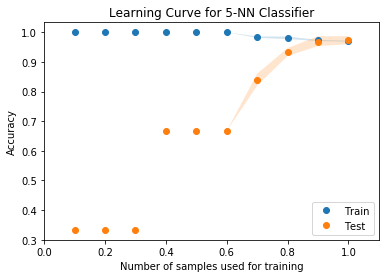

In [ ]:
joined = np.array([train_scores, test_scores]).transpose()
ax = sns.tsplot(joined, time=train_sizes, condition=['Train','Test'], interpolate=False)
ax.set_title("Learning Curve for 5-NN Classifier")
ax.set_xlabel("Number of samples used for training")
ax.set_ylabel("Accuracy")
plt.show()

Complexity Curves

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


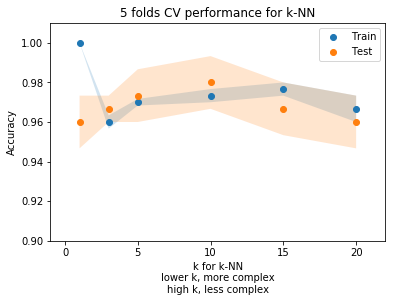

In [ ]:
num_neigh = [1,3,5,10,15,20]
KNC = neighbors.KNeighborsClassifier
tt = model_selection.validation_curve(KNC(),iris.data,iris.target,param_name='n_neighbors',param_range=num_neigh,cv=5)
ax = sns.tsplot(np.array(tt).transpose(),time=num_neigh,condition=['Train', 'Test'],interpolate=False)
ax.set_title("5 folds CV performance for k-NN")
ax.set_xlabel("\n".join(["k for k-NN","lower k, more complex","high k, less complex"]))
ax.set_ylim(.9,1.01)
ax.set_ylabel('Accuracy')
plt.show()

the curves chart indicate that with k=10, we will get the best accurcy for test phase

##### Compare leaners with Cross Validations

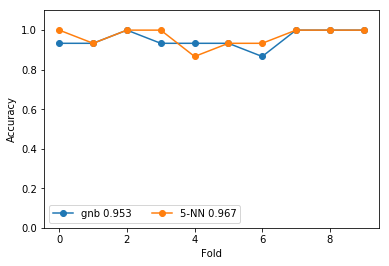

In [ ]:
classifiers = {'gnb': naive_bayes.GaussianNB(),
               '5-NN': neighbors.KNeighborsClassifier(n_neighbors=5)}
iris = datasets.load_iris()
fig, ax = plt.subplots(figsize=(6,4))
for name, model in classifiers.items():
    cv_scores = model_selection.cross_val_score(model, iris.data, iris.target,cv=10,scoring='accuracy',n_jobs=-1) # use all scores
    my_lbl = "{} {:.3f}".format(name,cv_scores.mean())
    ax.plot(cv_scores, '-o', label=my_lbl) # marker=next(markers)
ax.set_ylim(0.0,1.1)
ax.set_xlabel('Fold')
ax.set_ylabel('Accuracy')
ax.legend(ncol=2)
plt.show()

We see 5-NN appears to win on three folds while GNB wine on one, the others are visual ties 

##### Compare Leave one out with 2,3,5 and 10 folds cross validation

In [ ]:
model_selected = neighbors.KNeighborsClassifier(n_neighbors=5)
leave_one_out = model_selection.LeaveOneOut()
cvs = {'2-CV':2,'3-CV':3,'5-CV':5,'10-CV':10,'leave-one-out':leave_one_out}
scores={}
for cv_name,cv_value in cvs.items():
    score = model_selection.cross_val_score(model_selected,iris.data,iris.target,cv=cv_value,scoring='accuracy')
    score_mean = score.mean()
    scores.update({cv_name:score_mean})

for keys,values in scores.items():
    print(keys)
    print(values)



2-CV
0.94
3-CV
0.9869281045751634
5-CV
0.9733333333333334
10-CV
0.9666666666666668
leave-one-out
0.9666666666666667


testing with iris dataset ( 150 number of instances), 10 cross valiation and LOO seems has the same score - accuracy, 3 CV is the best